In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
import os
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras
from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle

In [25]:
train_folder = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
1,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
2,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
3,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
4,N,/kaggle/input/asl-alphabet/asl_alphabet_train/...
...,...,...
86995,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...
86996,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...
86997,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...
86998,J,/kaggle/input/asl-alphabet/asl_alphabet_train/...


In [26]:
x_train,x_holdout = train_test_split(data_df, test_size= 0.10, random_state=42,stratify=data_df[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.10, random_state=42,stratify=x_train[['label']])

In [ ]:
print(x_train.dtypes)


prac_batch_size

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 64,64
batch_size =128
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())

train_datagen = ImageDataGenerator(rescale=1/255.0)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,  # Potential issue: Are x_train, x_test, x_holdout data frames?
    x_col=x_col,
    y_col=y_col,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale=1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test,  # Potential issue: Are x_train, x_test, x_holdout data frames?
    x_col=x_col,
    y_col=y_col,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)

holdout_datagen = ImageDataGenerator(rescale=1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout,  # Potential issue: Are x_train, x_test, x_holdout data frames?
    x_col=x_col,
    y_col=y_col,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)


Found 70470 validated image filenames belonging to 29 classes.
Found 7830 validated image filenames belonging to 29 classes.
Found 8700 validated image filenames belonging to 29 classes.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 64,64
batch_size = 256
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())

train_datagen = ImageDataGenerator(rescale=1/255.0)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,  # Potential issue: Are x_train, x_test, x_holdout data frames?
    x_col=x_col,
    y_col=y_col,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale=1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test,  # Potential issue: Are x_train, x_test, x_holdout data frames?
    x_col=x_col,
    y_col=y_col,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)

holdout_datagen = ImageDataGenerator(rescale=1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout,  # Potential issue: Are x_train, x_test, x_holdout data frames?
    x_col=x_col,
    y_col=y_col,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)


Found 70470 validated image filenames belonging to 29 classes.
Found 7830 validated image filenames belonging to 29 classes.
Found 8700 validated image filenames belonging to 29 classes.


MODIFIED MOBILENET

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.layers import DepthwiseConv2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential()

# Entry Flow
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Middle Flow
for _ in range(4):
    model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())

# Exit Flow
model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())

# Output layer
model.add(Dense(29, activation='softmax'))

model.summary()



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_7              │ (None, 64, 64, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_8              │ (None, 32, 32, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_9              │ (None, 16, 16, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_10             │ (None, 16, 16, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │        16,51

 Total params: 132,125 (516.11 KB)

 Trainable params: 128,669 (502.61 KB)

 Non-trainable params: 3,456 (13.50 KB)

prac_code

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.layers import DepthwiseConv2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential()

# Entry Flow
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout after max pooling

model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout after max pooling

# Middle Flow
for _ in range(4):
    model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))  # Add dropout after each convolutional layer

# Exit Flow
model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))  # Add dropout before the output layer

# Output layer
model.add(Dense(29, activation='softmax'))

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_14             │ (None, 64, 64, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_15             │ (None, 32, 32, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_16             │ (None, 16, 16, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_17             │ (None, 16, 16, 128)    │         1,28

 Total params: 132,125 (516.11 KB)

 Trainable params: 128,669 (502.61 KB)

 Non-trainable params: 3,456 (13.50 KB)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),  # Use RMSprop optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

# batch_size=64

history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks = [early_stop])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-27 21:09:22.159630: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 2.77418, expected 2.32223
2024-04-27 21:09:22.159726: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4032: 2.79374, expected 2.3418
2024-04-27 21:09:22.159744: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4095: 3.33762, expected 2.88567
2024-04-27 21:09:22.159783: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8192: 4.35279, expected 3.51309
2024-04-27 21:09:22.159795: E external/local_xla/xla/service/gpu/buffer_compara

550/551 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.3587 - loss: 2.1403

2024-04-27 21:11:22.188663: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.85647, expected 2.94684
2024-04-27 21:11:22.188722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.4043, expected 4.49467
2024-04-27 21:11:22.188732: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.59602, expected 3.68639
2024-04-27 21:11:22.188740: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.15253, expected 4.24289
2024-04-27 21:11:22.188747: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.05608, expected 4.14645
2024-04-27 21:11:22.188755: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.52392, expected 5.61429
2024-04-27 21:11:22.188763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.76651, expected 5.85688
2024-04-27 21:11:22.188771: E external/local_xla/xla/ser

551/551 ━━━━━━━━━━━━━━━━━━━━ 134s 198ms/step - accuracy: 0.3596 - loss: 2.1373 - val_accuracy: 0.0484 - val_loss: 7.1039
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 96s 173ms/step - accuracy: 0.9209 - loss: 0.2545 - val_accuracy: 0.9337 - val_loss: 0.1783
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 94s 170ms/step - accuracy: 0.9717 - loss: 0.0907 - val_accuracy: 0.8286 - val_loss: 0.6482
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 96s 172ms/step - accuracy: 0.9854 - loss: 0.0501 - val_accuracy: 0.9667 - val_loss: 0.1170
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 98s 176ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9802 - val_loss: 0.0507
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 98s 175ms/step - accuracy: 0.9923 - loss: 0.0263 - val_accuracy: 0.9806 - val_loss: 0.0553
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 105s 188ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.7879 - val_loss: 1.5777
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 114s 204ms/step - accuracy: 0.9950 - loss: 0.0153 - 

In [31]:

.early_stop = EarlyStopping(monitor='val_loss',patience=5)

# batch_size=64

history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks = [early_stop])

Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 110s 197ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9299 - val_loss: 0.3187
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 107s 191ms/step - accuracy: 0.9967 - loss: 0.0098 - val_accuracy: 0.9349 - val_loss: 0.2795
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 106s 190ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9232 - val_loss: 0.3120
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 100s 179ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9618 - val_loss: 0.1708
Epoch 5/10
159/551 ━━━━━━━━━━━━━━━━━━━━ 1:03 162ms/step - accuracy: 0.9977 - loss: 0.0084

KeyboardInterrupt: 

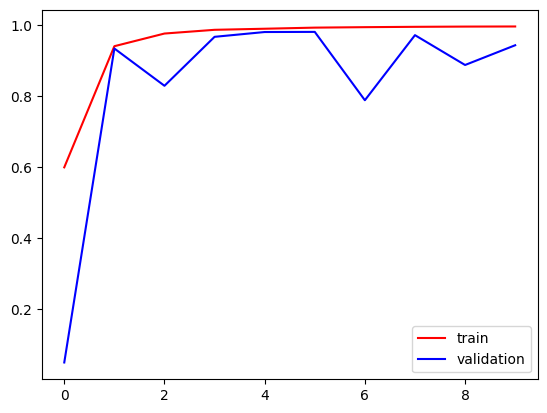

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

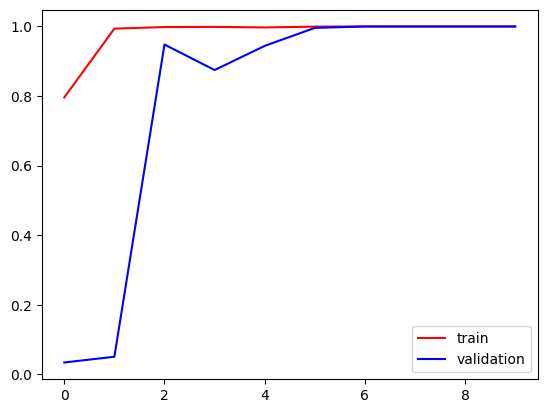

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

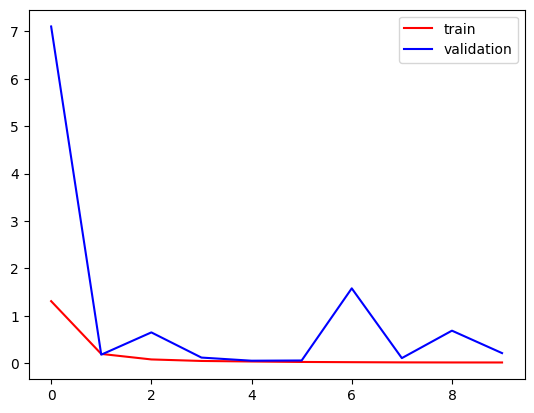

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
# Evaluate the model on the holdout set
holdout_evaluation = model.evaluate(holdout_generator)

# Print the evaluation metrics
print("Holdout Loss:", holdout_evaluation[0])
print("Holdout Accuracy:", holdout_evaluation[1])


67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.8943 - loss: 0.5033

2024-04-27 21:37:23.449962: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12288: 3.62123, expected 3.00142
2024-04-27 21:37:23.450026: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12289: 3.85363, expected 3.23382
2024-04-27 21:37:23.450041: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12290: 3.74034, expected 3.12053
2024-04-27 21:37:23.450052: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12291: 3.52278, expected 2.90297
2024-04-27 21:37:23.450065: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12292: 4.56136, expected 3.94155
2024-04-27 21:37:23.450083: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12296: 4.68637, expected 4.06656
2024-04-27 21:37:23.450093: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12297: 4.35609, expected 3.73627
2024-04-27 21:37:23.450103:

68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.8944 - loss: 0.5029
Holdout Loss: 0.4893183410167694
Holdout Accuracy: 0.8962069153785706


68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       300
           1       0.98      0.99      0.98       300
           2       1.00      0.99      1.00       300
           3       1.00      0.99      0.99       300
           4       0.81      0.96      0.88       300
           5       1.00      1.00      1.00       300
           6       0.97      0.90      0.94       300
           7       0.86      1.00      0.92       300
           8       1.00      0.84      0.91       300
           9       1.00      0.85      0.92       300
          10       1.00      0.89      0.94       300
          11       1.00      0.93      0.97       300
          12       0.74      0.96      0.84       300
          13       0.98      0.66      0.79       300
          14       0.97      0.91      0.94       300
          15       0.94      0.74      0.83       300
          16    

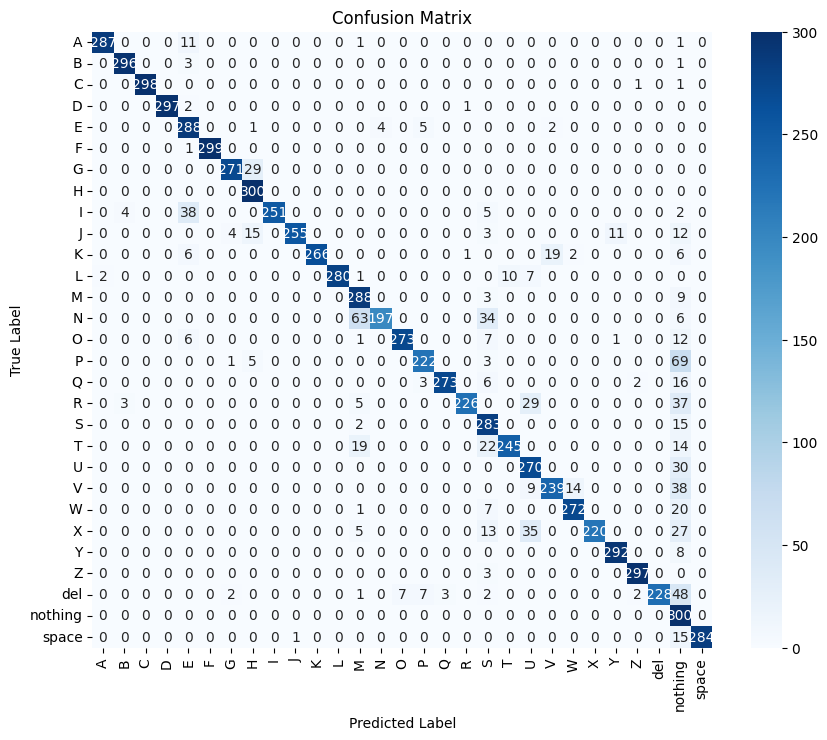

In [35]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make Predictions
holdout_predictions = model.predict(holdout_generator)

# 2. Convert predictions to class labels
holdout_pred_labels = np.argmax(holdout_predictions, axis=1)

# 3. Get true labels
true_labels = holdout_generator.classes

# 4. Compute Metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Classification Report
classification_rep = classification_report(true_labels, holdout_pred_labels)
print("Classification Report:")
print(classification_rep)

# ROC-AUC Score
roc_auc = roc_auc_score(to_categorical(true_labels, num_classes=no_of_classes), holdout_predictions)
print("ROC-AUC Score:", roc_auc)

# 5. Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, holdout_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=holdout_generator.class_indices.keys(), yticklabels=holdout_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
#


34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 341ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300
           7       1.00      1.00      1.00       300
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       300
          10       1.00      1.00      1.00       300
          11       1.00      1.00      1.00       300
          12       1.00      1.00      1.00       300
          13       1.00      1.00      1.00       300
          14       1.00      1.00      1.00       300
          15       1.00      1.00      1.00       300
          16    

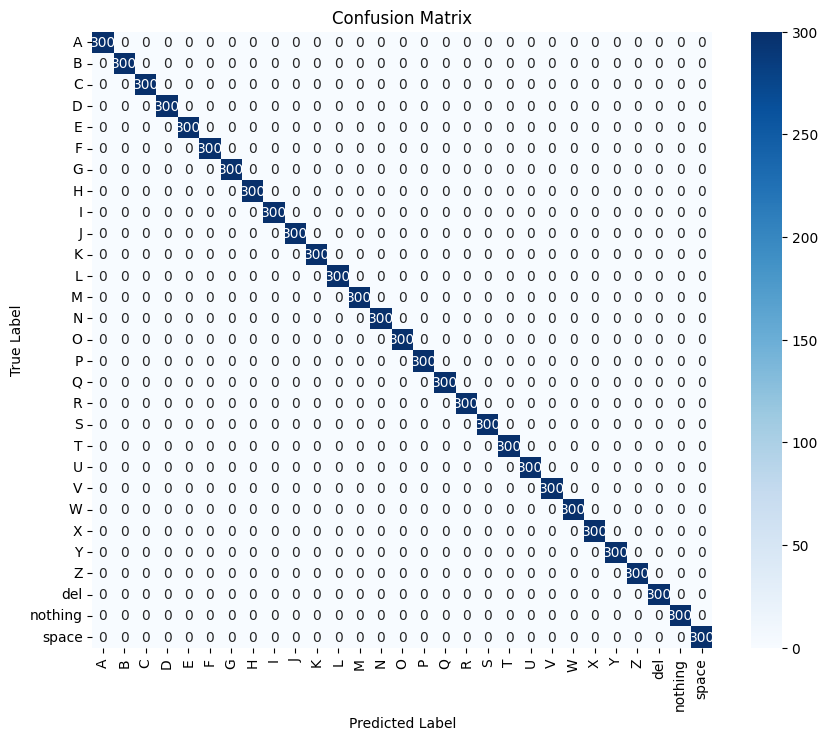

In [17]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make Predictions
holdout_predictions = model.predict(holdout_generator)

# 2. Convert predictions to class labels
holdout_pred_labels = np.argmax(holdout_predictions, axis=1)

# 3. Get true labels
true_labels = holdout_generator.classes

# 4. Compute Metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Classification Report
classification_rep = classification_report(true_labels, holdout_pred_labels)
print("Classification Report:")
print(classification_rep)

# ROC-AUC Score
roc_auc = roc_auc_score(to_categorical(true_labels, num_classes=no_of_classes), holdout_predictions)
print("ROC-AUC Score:", roc_auc)

# 5. Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, holdout_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=holdout_generator.class_indices.keys(), yticklabels=holdout_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
#


In [ ]:
# 6. Plot ROC Curves
from sklearn.metrics import auc

plt.figure(figsize=(10, 8))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(to_categorical(true_labels, num_classes=no_of_classes)[:, i], holdout_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

class_labels = list(holdout_generator.class_indices.keys())  # Convert dict_keys object to a list

for i in range(no_of_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], class_labels[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [40]:
from keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Y/Y1028.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Assuming your model expects input size of (64, 64)

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)

# Decode the prediction
predicted_label = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [41]:
# Define the dictionary
class_labels = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z',
    26: 'del', 27: 'nothing', 28: 'space'
}
prediction = model.predict(img_array)

# Decode the prediction
predicted_label_index = np.argmax(prediction)
predicted_label = class_labels[predicted_label_index]

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted label: Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted label: Y


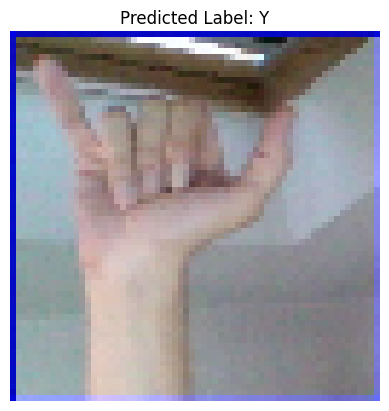

In [43]:
prediction = model.predict(img_array)

# Decode the prediction
predicted_label_index = np.argmax(prediction)
predicted_label = class_labels[predicted_label_index]
print("Predicted label:", predicted_label)
plt.imshow(img)
plt.title("Predicted Label: " + predicted_label)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


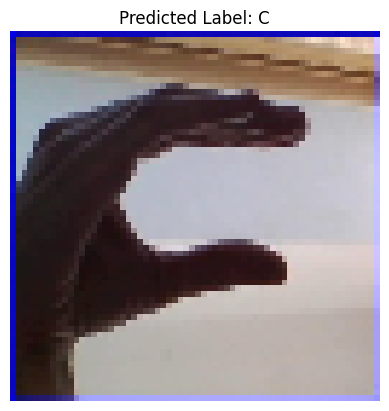

In [21]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/C/C1000.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Assuming your model expects input size of (64, 64)

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)

# Decode the prediction
predicted_label_index = np.argmax(prediction)
predicted_label = class_labels[predicted_label_index]

# Display the image
plt.imshow(img)
plt.title("Predicted Label: " + predicted_label)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


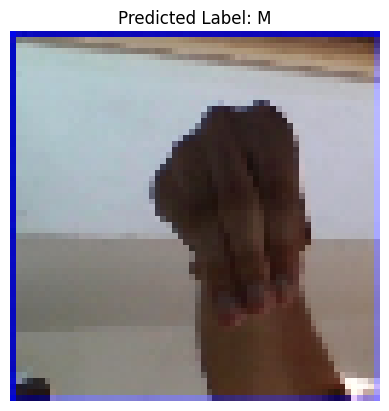

In [23]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/M/M10.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Assuming your model expects input size of (64, 64)

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)

# Decode the prediction
predicted_label_index = np.argmax(prediction)
predicted_label = class_labels[predicted_label_index]

# Display the image
plt.imshow(img)
plt.title("Predicted Label: " + predicted_label)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


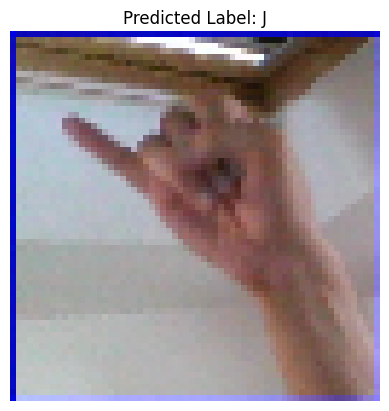

In [24]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/J/J1004.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Assuming your model expects input size of (64, 64)

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)

# Decode the prediction
predicted_label_index = np.argmax(prediction)
predicted_label = class_labels[predicted_label_index]

# Display the image
plt.imshow(img)
plt.title("Predicted Label: " + predicted_label)
plt.axis('off')
plt.show()


In [22]:
predictions = model.predict(holdout_generator, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = holdout_generator.classes
class_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       300
           B       1.00      1.00      1.00       300
           C       1.00      1.00      1.00       300
           D       1.00      1.00      1.00       300
           E       1.00      1.00      1.00       300
           F       1.00      1.00      1.00       300
           G       1.00      1.00      1.00       300
           H       1.00      1.00      1.00       300
           I       1.00      1.00      1.00       300
           J       1.00      1.00      1.00       300
           K       1.00      1.00      1.00       300
           L       1.00      1.00      1.00       300
           M       1.00      1.00      1.00       300
           N       1.00      1.00      1.00       300
           O       1.00      1.00      1.00       300
           P       1.00      1.00      1.00       300
           Q       1.00      1.00      

DENSENET